Task 3

In [8]:
!ls

data.processed_data.pkl		   model_list.json
en_stem_pos_LDAvis_prepared6	   README.md
en_stem_pos_LDAvis_prepared6.html  stem_pos_ldavis_prepared_6
ldavis_prepared_6		   train_tweets.csv
ldavis_prepared_6.html		   train_tweets.ods
LICENSE				   twitter_sentiment_analysis-Chatbot.ipynb
mb.csv				   twitter_sentiment_analysis-Copy3.ipynb
model_list-Copy1.json		   ulmfit.ipynb


In [11]:
import pickle
processed_data=None
with open("data.processed_data.pkl","rb") as f:
    processed_data = pickle.load(f)

In [9]:
train_orig = pd.read_csv("train_tweets.csv")

In [12]:
processed_data["user_type"]=train_orig["user_type"]

In [15]:
processed_data["user_type"]=processed_data["user_type"].fillna(0)

In [16]:
processed_data["user_type"] = processed_data["user_type"].astype(int)


In [17]:
# Check that the latest 1.0.0 build of PyTorch has been installed 
# alongside fastai
import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

CPU
PyTorch version:  1.2.0


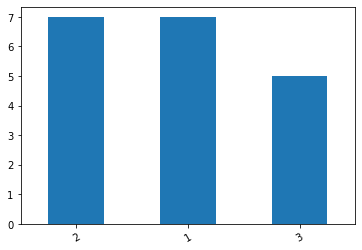

In [19]:
# Plot value counts for rach stance in the dataset
processed_data[processed_data["user_type"]!=0]["user_type"].value_counts().plot.bar(rot=30);

In [25]:
processed_data[processed_data["user_type"]!=0].columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'location',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'profile_image_url', 'lang', 'SentimentText', 'tokenized_text',
       'stem_tokenized_text', 'neg', 'neu', 'pos', 'compound', 'user_type'],
      dtype='object')

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(processed_data[processed_data["user_type"]!=0].tweet)
X_train_counts.shape
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(19, 347)

In [27]:
y=processed_data[processed_data["user_type"]!=0].user_type
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y)

In [31]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(processed_data[processed_data["user_type"]!=0].tweet, y)


# Performance of NB Classifier
import numpy as np
predicted = text_clf.predict(processed_data[processed_data["user_type"]!=0].tweet)
np.mean(predicted == y)

1.0

In [47]:
nb_predicted = text_clf.predict(processed_data[processed_data["user_type"]==0].tweet)

In [79]:

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SVC(probability = True))])

text_clf_svm = text_clf_svm.fit(processed_data[processed_data["user_type"]!=0].tweet, y)
predicted_svm = text_clf_svm.predict(processed_data[processed_data["user_type"]==0].tweet)

/home/zhanwang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
predicted_svm_proba = text_clf_svm.predict_proba(processed_data[processed_data["user_type"]==0].tweet)

In [92]:
order=np.argsort(predicted_svm_proba, axis=1)
order.shape
print( predicted_svm_proba[))


TypeError: 'numpy.ndarray' object is not callable

In [104]:
processed_data=processed_data[processed_data["user_type"]==0].assign(predicted_svm_proba=predicted_svm_proba[:, -1])

In [105]:
processed_data[processed_data["user_type"]==0]["predicted_svm_proba"]

0        0.356313
1        0.356731
2        0.356535
3        0.356736
4        0.356447
5        0.356861
6        0.356108
7        0.355982
8        0.356636
9        0.356790
10       0.356203
11       0.356380
12       0.356303
13       0.356244
14       0.356323
15       0.356761
16       0.356366
17       0.356472
20       0.356381
21       0.356376
22       0.356394
23       0.356428
24       0.356800
25       0.356563
26       0.356336
27       0.356543
28       0.356487
29       0.356800
30       0.356219
31       0.356090
           ...   
36830    0.356496
36831    0.356614
36832    0.356653
36833    0.356203
36834    0.356416
36835    0.356595
36836    0.356337
36837    0.356058
36838    0.356090
36839    0.356005
36840    0.356227
36841    0.356421
36842    0.356423
36843    0.356761
36844    0.356032
36845    0.356108
36846    0.355970
36847    0.356244
36848    0.356244
36849    0.355946
36850    0.356800
36851    0.356272
36852    0.356603
36853    0.356603
36854    0

In [46]:
len(processed_data[processed_data["user_type"]==0].tweet)

36841

### User type:
### 1 : current customers of Mercedes-Benz who own a Mercedes product  

In [66]:
processed_data[processed_data["user_type"]==0][nb_predicted==1].tweet

1        Posted @withrepost • @mercedesbenz_de Der perf...
6        A 4000 year history of the turban, from Mesopo...
7        S. Africa’s first black female fighter pilot t...
10       Мөнгөтэй аниа бна уу ? Хэсэг явалдаад ганц #Me...
12       Check out this video following a previous pres...
14       Happy Memorial Day 🇺🇸 Today & every day we hon...
15       The Best Or Nothing...  #GLE #MercedesBenz 📸//...
23       £14,595 + VAT for a BRAND NEW #MercedesBenz #V...
24       خصائص الراحة المتوفرة في الفئة GLC ستجعل كل رح...
29       EQCめちゃいいな。 #MercedesBenz  pic.twitter.com/Bhaj...
30       Here's sweet start to your driving experience....
34       Details matter. 🌟 #MercedesBenz #MercedesAMG #...
36       2009 Mercedes Benz ML350 For Sale. Contact/Wha...
37       Yeni bir haftaya Pazartesi ile başlangıç yapar...
40       @LewisHamilton took his 77th career victory, h...
45       Are you ready to be #Purplized?  #MykonosvIbiz...
46       Beast mode on!   #MykonosvIbiza #Gumball3000 #.

### 2 : prospective customers interested in buying a Mercedes  


In [69]:
processed_data[processed_data["user_type"]==0][nb_predicted==2].tweet

0        In celebration and remembrance of America's fa...
2        Mercedes-Benz - E63 AMG  #E63 #E63AMG #63AMG #...
3        Take a look at this #Unrecorded #MercedesBenzA...
4        #mercedesbenz #OH #O404 #classic #BusinThailan...
5        A lightning strike did this... Credit: liketo_...
8        #Bmw Thank Former Mercedes-Benz #Ceo Dieter Ze...
9        #g63 #amg #Mercedes #MercedesBenz #MercedesAMG...
11       #Zonda #AMG #W140 #V12 #AMG #600SEL #S600 #M12...
13       RT @MercedesBenz: The new #MercedesBenz #GLS o...
16       Grateful to all that have served.  #thankful #...
17       #mercedes #mercedes_amg #sonydeutschland #pixt...
20       "Mercedes-Benz ESF 2019 Envisions Safe Future ...
21       ⏩ ⏩ 🚍🚌#BomDia #UniaoTransporteBrasilia #UTB #M...
22       It's now or never! Get the Mercedes-Benz CLA 2...
25       #Repost gorden.wagener (get_repost) ・・・ Our gl...
26       ⚡️ TAEVision #Engineering on @tumblr #tumblr -...
27       Dachser integrates the fully-electric 18-tonne.

In [111]:
processed_data[processed_data["user_type"]==0].sort_values("predicted_svm_proba", ascending=False)[predicted_svm==2].tweet

2931     The distinctively styled #MercedesBenz SLS AMG...
30892    Taz’s first proper clean 🧽 🧼 🚘✨ Since the snow...
30893    Taz’s first proper clean 🧽 🧼 🚘✨ Since the snow...
15538    the coolest, cutest car ads ever~! 🤔🧐😎 #KrisWu...
32351    Had the pleasure of this @MercedesAMG E63s tod...
13081    Build one of the most beautiful cars ever made...
8554     The perfect companion for summer along the Fre...
10308    Underneath the skin of the new #MercedesBenz E...
15463    I upgraded, love this car!!#mercedesbenz  pic....
476      Mercedes-Amg GT Coupe 4 #mercedesbenz #MBmille...
3347     Everything ready! Gleich gehts los. #SwissMark...
8638     Will This ’93 Cobra R Be the New Priciest Fox-...
30660    is this a beauty? #MercedesBenz #Mercedes #Car...
26485    What about this other beauty? #MercedesBenz  p...
25453    The Mercedes EQ, is this the future of the Ger...
21180    @MrJamesMay @JeremyClarkson @RichardHammond dr...
8926     1929 #MercedesBenz SSK  #supercar #classiccar .

### 3 : churners who have abandoned Mercedes-Benz or are about to  

In [68]:
processed_data[processed_data["user_type"]==0][nb_predicted==3].tweet

11978    @MercedesBenz @MercedesBenzUSA #MercedesBenz @...
14400    #MercedesBenz is suing 4 #artists whose #mural...
14826    @MercedesBenzUSA #MercedesBenzUSA #MercedesBen...
16778    #MercedesMeAppSucks #MercedesBenz @MercedesBen...
17954    @MercedesBenz #MercedesBenzUSA @MercedesBenzUS...
Name: tweet, dtype: object

Series([], Name: tweet, dtype: object)